# Lab desenvolvido em sala de aula no dia 03/05/2023


| Alunos | Matriucla |
| --- | --- |
| Antonio Aldisio| 202028211 |
| Fernando Miranda| 190106565  |
| Lorrany Oliveira Souza | 180113992|

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, split, window, current_timestamp

In [2]:
spark = SparkSession.builder.master("spark://cm1:7077").appName("teste kafka").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/03 21:37:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
lines = spark.readStream.format("kafka").option("kafka.bootstrap.servers", "cm2:9092").option("subscribe", "student-a202028211-saida").option('includeTimestamp', 'true').load()

In [4]:
# Divide as linhas em palavras
words = lines.select(
    explode(
        split(lines.value, " ")
    ).alias("word"),
    current_timestamp().alias("timestamp")
)

In [5]:
# Conta o número de ocorrências de cada palavra e associa a um timestamp
wordCounts = words \
    .groupBy(
        window(words.timestamp, "10 minutes", "5 minutes"),
        words.word
    ) \
    .count() \
    .withColumnRenamed("window", "timestamp") \
    .withColumn("timestamp", current_timestamp())

In [6]:
# Define a saída do DataFrame
query = wordCounts \
    .writeStream \
    .outputMode("complete") \
    .format("console") \
    .option("truncate", False) \
    .start()

23/05/03 21:37:55 WARN ResolveWriteToStream: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-5133507c-0ce8-4912-abf9-1f5628ebaf06. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.
23/05/03 21:37:55 WARN ResolveWriteToStream: spark.sql.adaptive.enabled is not supported in streaming DataFrames/Datasets and will be disabled.


In [ ]:
# Inicia a aplicação e começa a enviar palavras pelo socket
query.awaitTermination()

-------------------------------------------
Batch: 0
-------------------------------------------
+---------+----+-----+
|timestamp|word|count|
+---------+----+-----+
+---------+----+-----+



-------------------------------------------
Batch: 1
-------------------------------------------
+----------------------+-----+-----+
|timestamp             |word |count|
+----------------------+-----+-----+
|2023-05-03 21:38:05.49|teste|1    |
|2023-05-03 21:38:05.49|teste|1    |
+----------------------+-----+-----+



-------------------------------------------
Batch: 2
-------------------------------------------
+-----------------------+-----+-----+
|timestamp              |word |count|
+-----------------------+-----+-----+
|2023-05-03 21:38:08.554|teste|2    |
|2023-05-03 21:38:08.554|teste|2    |
+-----------------------+-----+-----+



-------------------------------------------
Batch: 3
-------------------------------------------
+-----------------------+-----+-----+
|timestamp              |word |count|
+-----------------------+-----+-----+
|2023-05-03 21:38:19.803|teste|2    |
|2023-05-03 21:38:19.803|como |1    |
|2023-05-03 21:38:19.803|bela |1    |
|2023-05-03 21:38:19.803|a    |2    |
|2023-05-03 21:38:19.803|teste|2    |
|2023-05-03 21:38:19.803|vida |2    |
|2023-05-03 21:38:19.803|a    |2    |
|2023-05-03 21:38:19.803|vida |2    |
|2023-05-03 21:38:19.803|como |1    |
|2023-05-03 21:38:19.803|e    |1    |
|2023-05-03 21:38:19.803|bela |1    |
|2023-05-03 21:38:19.803|e    |1    |
+-----------------------+-----+-----+



-------------------------------------------
Batch: 4
-------------------------------------------
+-----------------------+------+-----+
|timestamp              |word  |count|
+-----------------------+------+-----+
|2023-05-03 21:38:40.389|teste |2    |
|2023-05-03 21:38:40.389|como  |1    |
|2023-05-03 21:38:40.389|bela  |1    |
|2023-05-03 21:38:40.389|a     |2    |
|2023-05-03 21:38:40.389|teste |2    |
|2023-05-03 21:38:40.389|vida  |2    |
|2023-05-03 21:38:40.389|testes|1    |
|2023-05-03 21:38:40.389|a     |2    |
|2023-05-03 21:38:40.389|vida  |2    |
|2023-05-03 21:38:40.389|como  |1    |
|2023-05-03 21:38:40.389|e     |1    |
|2023-05-03 21:38:40.389|testes|1    |
|2023-05-03 21:38:40.389|bela  |1    |
|2023-05-03 21:38:40.389|e     |1    |
+-----------------------+------+-----+



-------------------------------------------
Batch: 5
-------------------------------------------
+-----------------------+------+-----+
|timestamp              |word  |count|
+-----------------------+------+-----+
|2023-05-03 21:38:50.272|teste |3    |
|2023-05-03 21:38:50.272|como  |1    |
|2023-05-03 21:38:50.272|bela  |1    |
|2023-05-03 21:38:50.272|a     |2    |
|2023-05-03 21:38:50.272|teste |3    |
|2023-05-03 21:38:50.272|vida  |2    |
|2023-05-03 21:38:50.272|testes|1    |
|2023-05-03 21:38:50.272|a     |2    |
|2023-05-03 21:38:50.272|vida  |2    |
|2023-05-03 21:38:50.272|como  |1    |
|2023-05-03 21:38:50.272|e     |1    |
|2023-05-03 21:38:50.272|testes|1    |
|2023-05-03 21:38:50.272|bela  |1    |
|2023-05-03 21:38:50.272|e     |1    |
+-----------------------+------+-----+



# Print da terminal

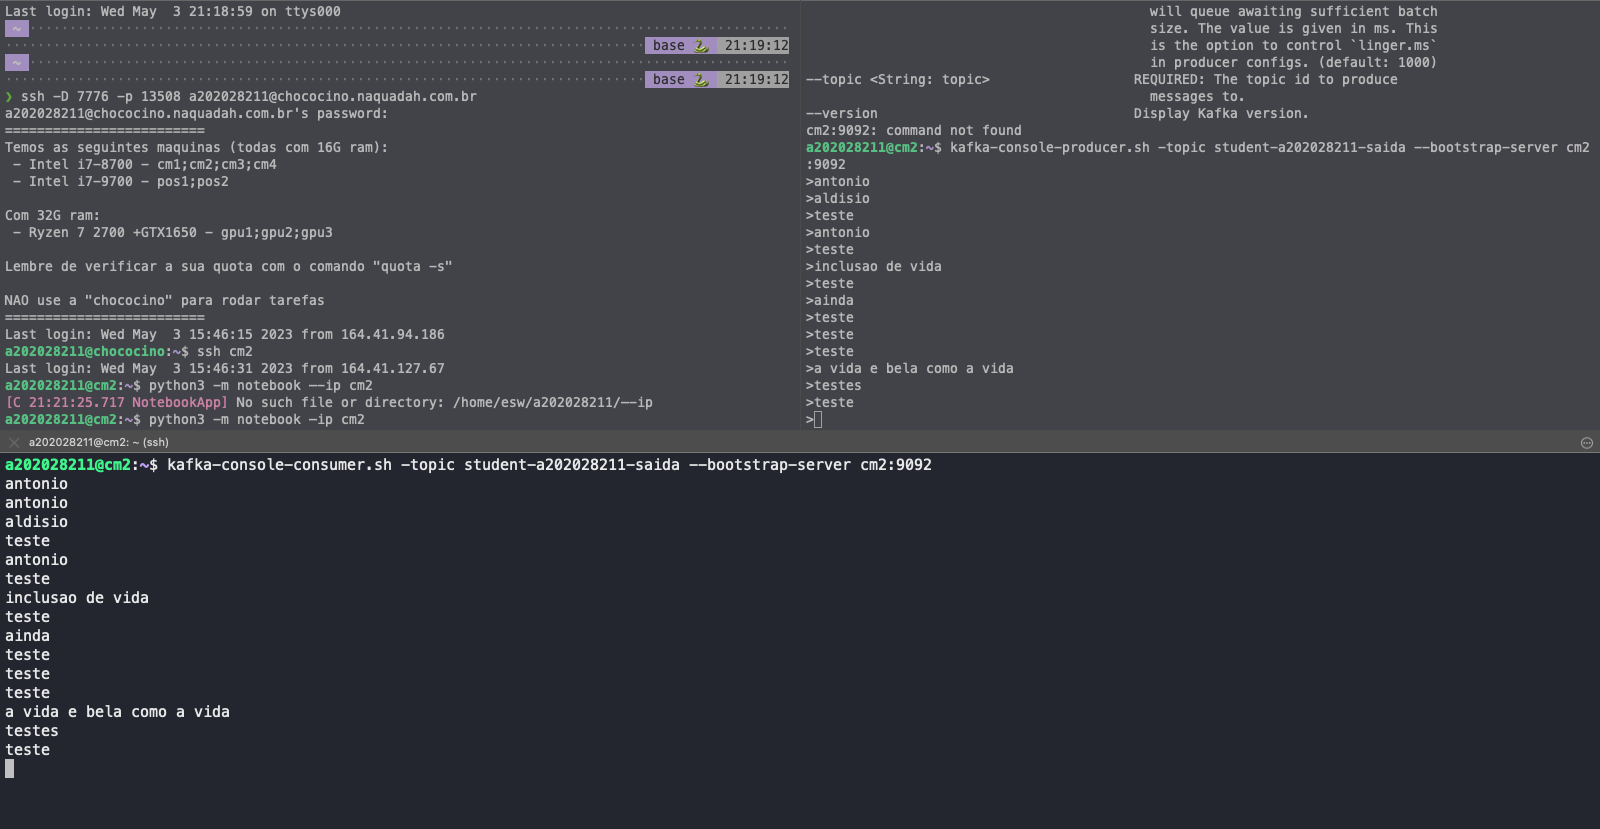